<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/13_06_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv', sep =',')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____ Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1).


In [3]:
print(f'Numero righe: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe: 2000
Numero colonne: 21


In [6]:
df.isnull().values.sum() #0 missing values

np.int64(0)

In [7]:
df['price_range'].value_counts() #il dataset è bilanciato con 500 istanze per ciascun range

,count
price_range,
1,500
2,500
3,500
0,500


Considerare la feature battery_power e rappresentare con un istogramma la distribuzione dei valori. Raggruppare poi i valori secondo questa suddivisione: gruppo1 501-800; gruppo2 801-1200; gruppo3 1201-1600; gruppo4 1601-1998, visualizzare la distribuzione nei gruppi. Indicare per ogni gruppo il numero di istanze per ogni range di prezzo. (punti 3)

In [9]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

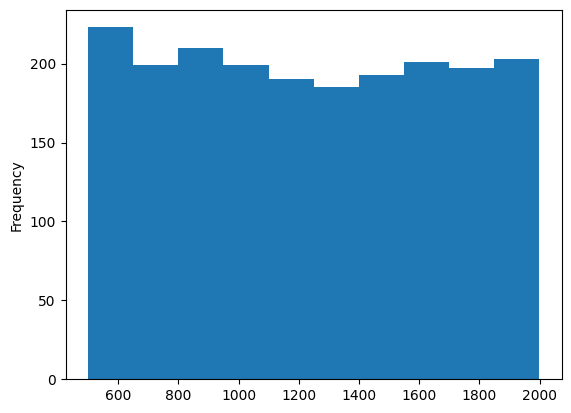

In [10]:
plt.figure()
df['battery_power'].plot.hist()

<Axes: xlabel='battery_group'>

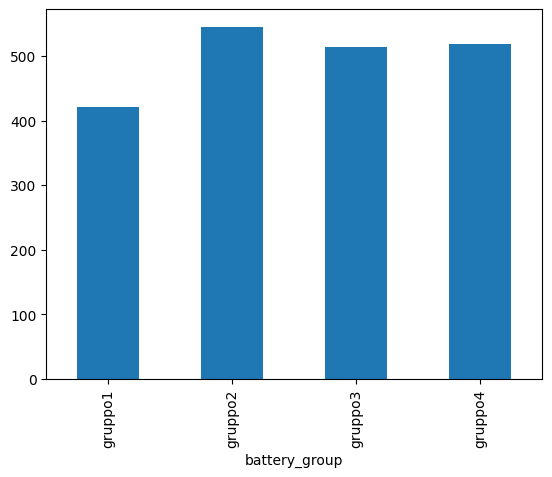

In [19]:
bins = [500, 800, 1200, 1600, 1998]  # 4 gruppi continui
labels = ['gruppo1', 'gruppo2', 'gruppo3', 'gruppo4']
df['battery_group'] = pd.cut(df['battery_power'], bins=bins, labels=labels, right=True)
#right = true indica che il bordo destro è incluso (es: 800 va in gruppo1).
df['battery_group'].value_counts().sort_index().plot(kind='bar')

In [16]:
df.pivot_table(
    values='battery_power',   # qualsiasi colonna numerica
    index='battery_group',
    columns='price_range',
    aggfunc='count'
)

/tmp/ipython-input-203849673.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


price_range,0,1,2,3
battery_group,,,,
gruppo1,137,107,120,58
gruppo2,167,142,122,114
gruppo3,113,127,123,151
gruppo4,83,124,135,177


Considerare solo i cellulari che hanno il 4G e una RAM superiore (>) a 2 GB (2048 MB). Rappresentare in uno scatterplot i valori di ram (ascisse) e memoria interna (ordinate). Colorare i punti nel grafico in base al valore della colonna price_range. Usare i nomi dei due attributi come etichette dell’asse delle ascisse e dell’asse delle ordinate. (punti 4)

Text(0, 0.5, 'int_mem')

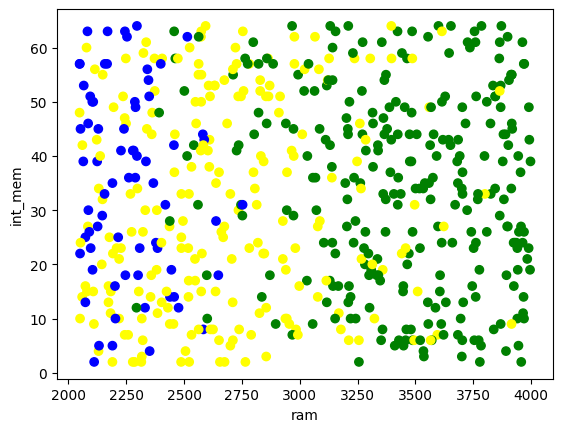

In [24]:
ram = df[(df['four_g']==1) & (df['ram']>=2048)]['ram']
int_mem = df[(df['four_g']==1) & (df['ram']>=2048)]['int_memory']
colors = df[(df['four_g']==1) & (df['ram']>=2048)]['price_range'].map({0: 'red', 1: 'blue',2:'yellow',3:'green'})
plt.scatter(ram, int_mem, c=colors)
plt.xlabel("ram")
plt.ylabel("int_mem")


Realizzare una tabella pivot in cui rappresentare il numero di cellulari per ogni range di prezzo (variabile sulle colonne) considerando sulle righe le variabili touch_screen e int_memory (suddivisa in 5 gruppi). (punti 2)

In [33]:
# Utilizzo di pd.cut per dividere in 5 fasce di ampiezza uguale
df['int_memory_equal_width'] = pd.cut(df['int_memory'], bins=5, duplicates='drop', precision=0).astype(str)

# Creazione della Tabella Pivot
pivot_table_cut = df.pivot_table(
    index=['touch_screen', 'int_memory_equal_width'],
    values='battery_power',  # una colonna numerica qualsiasi
    columns='price_range',
    aggfunc='count',
    fill_value=0
) #size conta righe per grupp. Fill_value sostituisce i valori nAn con 0. Index sono le righe
#Quando vuoi solo il numero di righe in ciascun gruppo, usa aggfunc='size'. con size non sarebbe necessario specificare "values"
#Se vuoi contare solo le righe con valori non nulli in una colonna specifica, usa aggfunc='count'.
pivot_table_cut

price_range                           0   1   2   3
touch_screen int_memory_equal_width                
0            (14.0, 27.0]            46  43  53  50
             (2.0, 14.0]             53  49  56  52
             (27.0, 39.0]            47  56  52  53
             (39.0, 52.0]            35  51  49  50
             (52.0, 64.0]            57  40  55  47
1            (14.0, 27.0]            48  49  44  43
             (2.0, 14.0]             71  61  68  44
             (27.0, 39.0]            56  51  42  44
             (39.0, 52.0]            44  52  42  63
             (52.0, 64.0]            43  48  39  54

--------------------------------------------------
PARTE 2
--------------------------------------------------

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error

1.1. Si vuole predire il valore di range di prezzo sulla base degli attributi presenti nel dataset. Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le eventuali istanze che contengono valori nulli, e dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e 1/4 nel dataset “test” preservando le proporzioni delle classi nella colonna target.

In [36]:
df = pd.read_csv('dataset.csv')
#df.isnull().sum()
df.dropna(inplace=True) #elimino valori nulli, in questo caso non ce ne sono. obbligatorio mettere inplace per modificare davvero df. oppure scrivi df = df.dropna()
df.shape
df.drop_duplicates(inplace=True) #in questo caso non ce n'è
df.shape
#df.dtypes
X = df.drop('price_range', axis = 1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) #stratify garanisce che ci siano esempi di tutte le cateforie (di prezzi di telefono in questo caso)

Allenare il train con il modello DecisionTree e valutare l’accuracy ottenuta calcolata sia sul dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello KNeighborsClassifier. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion matrix e la predizione effettuata da un dummy classifier a scelta. (punti 4)

In [41]:
#def di un dizionario con i modelli da testare è una convenzione che si fa, in quest caso il modello è uno solo
models = {'decision tree': DecisionTreeClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DummyClassifier': DummyClassifier()}
def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"confusion matrix on train {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test {confusion_matrix(testlabels,testpred)}")
  print(f"accuracy matrix on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy matrix on test {accuracy_score(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #come si può vedere osservado le confusion matrix si può osservare che il decision tree è quello che funziona meglio, ha gli elementi con valore massimo tutti sulla diagonale
  #principale, anche knn funziona bene ma quello che funziona peggio è il dummt classifier che tende ad assegnare tutti i telefoni di tutte le cateogrie di prezzo con in classe 0.
  #il problema è che il decision tree overfitta siccome ha accuracy del 100% sul training set per cui il modello migliore osservando anche la ccuracy è il kn

 ===== decision tree =====
confusion matrix on train [[375   0   0   0]
 [  0 375   0   0]
 [  0   0 375   0]
 [  0   0   0 375]]
confusion matrix on test [[117   8   0   0]
 [ 14  96  15   0]
 [  0   9  99  17]
 [  0   0  16 109]]
accuracy matrix on train 1.0
accuracy matrix on test 0.842
 ===== KNeighborsClassifier =====
confusion matrix on train [[360  15   0   0]
 [ 12 351  12   0]
 [  0  15 343  17]
 [  0   0  19 356]]
confusion matrix on test [[123   2   0   0]
 [  2 118   5   0]
 [  0   6 113   6]
 [  0   0   8 117]]
accuracy matrix on train 0.94
accuracy matrix on test 0.942
 ===== DummyClassifier =====
confusion matrix on train [[375   0   0   0]
 [375   0   0   0]
 [375   0   0   0]
 [375   0   0   0]]
confusion matrix on test [[125   0   0   0]
 [125   0   0   0]
 [125   0   0   0]
 [125   0   0   0]]
accuracy matrix on train 0.25
accuracy matrix on test 0.25


Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con una 10 Fold cross validation. (punti 1)

In [42]:
# cross_val_score ritorna array di score su ciascun fold
accuracy_scores_dt = cross_val_score( DecisionTreeClassifier() ,X, y, cv=10, scoring='accuracy')
print("decision tree  accuracy 10-fold:", accuracy_scores_dt)
print("decision tree  accuracy 10-fold:", np.mean(accuracy_scores_dt))


araccuracy_scores_kn = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy')
print("kn accuracy 10-fold:", araccuracy_scores_kn)
print("kn accuracy 10-fold", np.mean(araccuracy_scores_kn))

accuracy_score_dc = cross_val_score(DummyClassifier(), X, y, cv=10, scoring='accuracy')
print("dummy classifier accuracy 10-fold:", accuracy_score_dc)
print("dummy classifier accuracy 10-fold", np.mean(accuracy_score_dc))

#si può osservare che applicando una 10 fold cross validation l'accuracy massima si ottiene anche in questo caso con il kn

decision tree  accuracy 10-fold: [0.82  0.88  0.86  0.805 0.87  0.815 0.825 0.805 0.84  0.815]
decision tree  accuracy 10-fold: 0.8334999999999999
kn accuracy 10-fold: [0.9   0.94  0.92  0.935 0.925 0.95  0.915 0.915 0.915 0.92 ]
kn accuracy 10-fold 0.9235000000000001
dummy classifier accuracy 10-fold: [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
dummy classifier accuracy 10-fold 0.25


 Trovare i parametri migliori del classificatore DecisionTree. Agire sui parametri criterion e min_samples_leaf. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera quella ottenuta con i parametri di default al punto 1. (punti 3)

In [44]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_los'],
    'min_samples_leaf':[1,2,5,10,20,100]
}
#devi specificare refit quando si calcolano due metriche insieme.
gd_dt = GridSearchCV(DecisionTreeClassifier(),
                     parameters,
                     scoring='accuracy',
                     cv=5,
                     refit='accuracy')
gd_dt.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_los'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 100]},
             refit='accuracy', scoring='accuracy')

In [45]:
best_par = gd_dt.best_params_
best_par

{'criterion': 'entropy', 'min_samples_leaf': 5}

In [46]:
best_score = gd_dt.best_score_
best_score

np.float64(0.8400000000000001)

In [48]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"accuracy on test {accuracy_score(y_test, y_test_pred_best)}")
print(f"accuracy on train {accuracy_score(y_train, y_train_pred_best)}")
#si osserva che le performance migliorano non arrivando all'overfitting

accuracy on test 0.894
accuracy on train 0.9526666666666667


Studiare la correlazione tra tutte le feature del dataset, creare un dataframe che contiene, oltre alla colonna target, le 5 feature più correlate (positivamente) al target. Ripetere la classificazione sul nuovo dataset e verificare se l’accuratezza ottenuta con DecisionTree e KNeighborsClassifier migliora (punti 3).

In [49]:
correlation_matrix = df.corr() #Calcola la correlazione tra tutte le colonne numeriche del DataFrame df
#Seleziona le 5 feature più correlate con il target (price_range)
top_correlated_features = correlation_matrix['price_range'].sort_values(ascending=False)[1:6].index.tolist()
new_df = df[['price_range'] + top_correlated_features] #unisce due liste: una lista che contiene solo la colonna target (['price_range']) e la lista delle feature più correlate (top_correlated_features)
new_df

,price_range,ram,battery_power,px_width,px_height,int_memory
0,1,2549,842,756,20,7
1,2,2631,1021,1988,905,53
2,2,2603,563,1716,1263,41
3,2,2769,615,1786,1216,10
4,1,1411,1821,1212,1208,44
...,...,...,...,...,...,...
1995,0,668,794,1890,1222,2
1996,2,2032,1965,1965,915,39
1997,3,3057,1911,1632,868,36
1998,0,869,1512,670,336,46


In [51]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('price_range', axis=1), new_df['price_range'], test_size=0.25, random_state=42)

models = {'decision tree': DecisionTreeClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy score on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy score on test {accuracy_score(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #sul decision tree si osserva che sul test non si hanno risultati ottimali siccome si fa overfitting nel train
  #per quanto riguarda il KN invece si ottengono degli ottimi risultati

 ===== decision tree =====
accuracy score on train 1.0
accuracy score on test 0.858
 ===== KNeighborsClassifier =====
accuracy score on train 0.9566666666666667
accuracy score on test 0.932


Creare una pipeline in cui gli attributi int_memory, ram e talk_time sono scalati in modo che abbiano media 0 e varianza 1, gli attributi mobile_wt e battery_power sono discretizzati in 5 intervalli, e tutti gli altri attributi sono lasciati invariati. La pipeline deve applicare il modello DecisionTree con i parametri migliori trovati al punto 2. Valutare l’accuratezza della classificazione. (punti 3)

In [53]:
col_tran = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(),["int_memory","ram","talk_time"]),
        ('discr', KBinsDiscretizer(n_bins = 5), ["mobile_wt","battery_power"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)
pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, random_state=42)),
                             ])

pipeline



Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['int_memory', 'ram',
                                                   'talk_time']),
                                                 ('discr', KBinsDiscretizer(),
                                                  ['mobile_wt',
                                                   'battery_power'])])),
                ('estimator',
                 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                                        random_state=42))])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
pipeline.fit(X_train,y_train)
y_pred_pl = pipeline.predict(X_test)
print(f"accuracy: {accuracy_score(y_test,y_pred_pl):.4f}")

accuracy: 0.8540


Aggiungere alla pipeline del punto 5 la funzione SelectKBest (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html ?highlight=selectkbest#sklearn.feature_selection.SelectKBest). Utilizzare la funzione di gridSearchCV per selezionare il K migliore e anche il numero migliore di bin in cui discretizzare i valori di mobile_wt e battery_power (scegliere a piacere alcuni valori) (punti 3).

In [56]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_kbest = Pipeline(steps=[
    ('coltran', col_tran),
    ('kbest', SelectKBest()),
    ('estimator', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, random_state=42))
])

pipeline_kbest

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['int_memory', 'ram',
                                                   'talk_time']),
                                                 ('discr', KBinsDiscretizer(),
                                                  ['mobile_wt',
                                                   'battery_power'])])),
                ('kbest', SelectKBest()),
                ('estimator',
                 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                                        random_state=42))])

In [58]:
parameters = {
    'coltran__discr__n_bins' : [2,5,7,10],
    'kbest__k' : [3,5,7,"all"],
}
gd = GridSearchCV(pipeline_kbest, parameters, scoring="accuracy", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)
print(f"bestparam {gd.best_params_}")
print(f"bestscore {gd.best_score_}")
print("test accuracy:", accuracy_score(y_test, y_pred))

bestparam {'coltran__discr__n_bins': 2, 'kbest__k': 5}
bestscore 0.8453333333333333
test accuracy: 0.882


7. Creare una nuova pipeline che applica la decomposizione TruncatedSVD (simile alla PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) al dataset iniziale e aggiunge le componenti ottenute alla pipeline del punto 5. Valutare il valore migliore per il numero di componenti di TruncatedSVD tra 2, 4 e 6. (punti 3).

In [59]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

parameters = {
    'combined_features__svd__n_components': [2, 4, 6]
}

combined_features = FeatureUnion([("svd", TruncatedSVD()), ("coltran", col_tran)])

my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                              ("estimator", DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, random_state=42))
                             ]) #verbose = True) #verbose serve solo a farti vedere cosa sta succedendo mentre la pipeline viene eseguita.

gd = GridSearchCV(my_pipeline, parameters)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)
gd.best_params_

Accuracy: 0.958


{'combined_features__svd__n_components': 6}

In [61]:

my_pipeline

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('svd', TruncatedSVD()),
                                                ('coltran',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('std',
                                                                                  StandardScaler(),
                                                                                  ['int_memory',
                                                                                   'ram',
                                                                                   'talk_time']),
                                                                                 ('discr',
                                                                                  KBinsDiscretizer(),
                                                                                  ['mobile_wt',
                                                                                   'battery_power'])]))])),
                ('estimator',
                 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                                        random_state=42))],
         verbose=True)